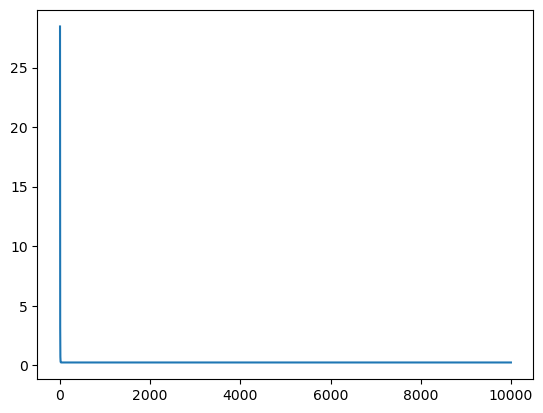

In [5]:
import torch

w_true = torch.Tensor([1,2,3])

x = torch.cat([torch.ones(100,1),torch.randn(100,2)],1)

y = torch.mv(x,w_true)+torch.randn(100)*0.5

w = torch.randn(3,requires_grad = True)

gamma = 0.1

losses = []

for epoch in range(10000):
    w.grad = None
    
    y_pred = torch.mv(x,w)
    
    loss = torch.mean((y-y_pred)**2)
    loss.backward()
    
    w.data = w.data - gamma*w.grad.data
    
    losses.append(loss.item())
    
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

In [7]:
w


tensor([0.9742, 1.9778, 3.0105], requires_grad=True)

In [8]:
from torch import nn,optim

In [9]:
net = nn.Linear(in_features=3,out_features=1,bias=False)

In [10]:
optimizer = optim.SGD(net.parameters(),lr = 0.1)

In [11]:
loss_fn = nn.MSELoss()

In [12]:
losses = []

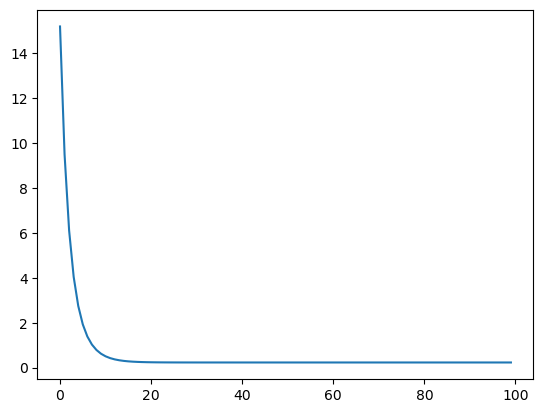

In [13]:
for epoch in range(100):
    optimizer.zero_grad()
    
    y_pred = net(x)
    
    loss = loss_fn(y_pred.view_as(y),y)
    
    loss.backward()
    
    optimizer.step()
    
    losses.append(loss.item())
    
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

In [20]:
list(net.parameters())

[Parameter containing:
 tensor([[0.9742, 1.9778, 3.0105]], requires_grad=True)]